# Applied Statistics #

## Project ##

This project forms part of the assessment for the Applied Statistics module of the Higher Diploma in Data Analytics from ATU. In it, I will analyse the PlantGrowth R Dataset: this dataset consists of "results from an experiment to compare yields (as measured by dried weight of plants) obtained under a control and two different treatment conditions." 

The dataset consists of the 30 rows relating to a sample of a plant. Each row contains data for the weight of the sample plant and whether the sample belongs to the control group, the group which has received 'treatment 1' or the group which has received 'treatment 2'; each of these three groups contain 10 samples. Despite searching, I was unable to determine the unit of measurement of the yields in this dataset, but it seems probable to me that the yields are measured in grams; I have labelled my plots below with this unit of measurement.

For this project, I will give an overview of what a **t-test** is, how it works, and what the assumptions are.

Next, I will carry out a **t-test** on the PlantGrowth R Dataset to determine whether there is a significant difference between the **two** treatment groups trt1 and trt2.

Then to investigate whether there is a significant difference between the **three** treatment groups ctrl, trt1, and trt2, I will carry out **ANOVA**.


In [14]:
# First I will import the libraries which I will use for this project
# Numerical arrays.
import numpy as np

# Statistical functions.
import scipy.stats as stats

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

I will use `pandas` to create a dataframe from the 'PlantGrowth.csv' file:

In [15]:
# creating a dataframe using pandas, passing in the relative path to the file
df = pd.read_csv('./data/plantGrowth.csv')

print(df)

    rownames  weight group
0          1    4.17  ctrl
1          2    5.58  ctrl
2          3    5.18  ctrl
3          4    6.11  ctrl
4          5    4.50  ctrl
5          6    4.61  ctrl
6          7    5.17  ctrl
7          8    4.53  ctrl
8          9    5.33  ctrl
9         10    5.14  ctrl
10        11    4.81  trt1
11        12    4.17  trt1
12        13    4.41  trt1
13        14    3.59  trt1
14        15    5.87  trt1
15        16    3.83  trt1
16        17    6.03  trt1
17        18    4.89  trt1
18        19    4.32  trt1
19        20    4.69  trt1
20        21    6.31  trt2
21        22    5.12  trt2
22        23    5.54  trt2
23        24    5.50  trt2
24        25    5.37  trt2
25        26    5.29  trt2
26        27    4.92  trt2
27        28    6.15  trt2
28        29    5.80  trt2
29        30    5.26  trt2


### T-test ###

According to Wikipedia, a T-test is 'a statistical test used to test whether the difference between the response of two groups is statistically significant or not'. We can use it to test whether we can reject a null (default) hypothesis that two groups have the same mean values. If we have more than two groups which we would like to compare the means of we must use a multiple comparisons test such as ANOVA (Analysis of Variance) instead.

In the context of comparing mean values of populations, the null hypothesis is the hypothesis that there is no difference between the means of the two populations. Depending on how extreme the outcome of the experiment is, we can either reject the null hypothesis or fail to reject the null hypothesis. If the value of the t-statistic calculated using the sample data is sufficiently extreme and the probability (p-value) of such a value occurring is less than a chosen level (α or alpha), often 5%, then we reject the null hypothesis. Otherwise, we fail to reject the null hypothesis. It should be noted that if we fail to reject the null hypothesis, this does not prove that the null hypothesis is true; rather, that the data do not provide strong enough evidence against it.

Depending on the nature of the data we want to investigate and the aim of our experiment, we can carry out a one sample t-test, a two-sample t-test or a paired t-test:
- one sample t-test: Example: testing if the height of a randomly selected group of 100 men from a country differs from the supposed national average.
- two sample t-test: also called independent samples t-test. Example: Two different groups of 20 people follow different weight loss diets over the course of 4 weeks and their average weight loss is compared at the end.
- paired t-test: also called dependent samples t-test. Example: A group of 20 subjects is asked to sit a maths exam at 9 am before having a coffee, and their average score is measured. The next day, they sit another maths exam, but have a coffee one hour before, and their average score is measured. The difference is average scores are analysed.

Some assumptions which underpin t-tests include the following:
- Data are continuous rather than discrete
- Sample data have been randomly sampled from a population
- Groups of data being analysed have homogeneous variances (variability is equal within each group)
- Data are normally distributed

To carry out a t-test, we need to do the following:
1. Outline what the null (H0) and alternative hypotheses (Ha) will be for our test.
2. Decide what level of significance we will use (α or alpha). 
3. Check that the assumptions of a t-test are met for the data being tested.
4. Choose the correct formulation of the t-test - that is, is it a one-sample test or two-sample test.
5. Perform the test and compare the calculated t-statistic to a theoretical value from a t-distribution which takes account of the degrees of freedom of the data. 

### T-test on PlantGrowth dataset ###

To compare the mean of the two treatment groups, trt1 and trt2, we can use an independent samples t-test. The reason we use an independent samples test, is that each sample in the trt1 group is not related to any of the samples in trt2 group.

To carry out such a test on our data, we will use the `ttest_ind` function from `scipy stats`:

In [16]:
# to use ttest_ind, we will need to prepare the arguments 'trt_1' and 'trt_2' which will be passed into the function:
# trt_1: this creates a dataframe consisting of the weights where the value in the column 'group' of 
# the original dataframe 'df' is equal to 'trt 1'
trt_1 = df[df['group'] == 'trt1']['weight']

# likewise for trt_2:
trt_2 = df[df['group'] == 'trt2']['weight']

# once we have these two sub-dataframes, we can pass them into ttest_ind()

stats.ttest_ind(trt_1, trt_2)

TtestResult(statistic=-3.0100985421243616, pvalue=0.0075184261182198574, df=18.0)

We can interpret the results of this t-test as follows:

**T-stat** = approx -3.01. This indicates that the mean of the first group was 3 standard errors away from the mean of the second group. We can also tell that the mean of the first group was smaller than the mean of the second group, because in the formula

![ind_ttest_formula](img/ind_ttest_formula.jpg)

we subtract the mean of the second group from the mean of the first group.

**P-value** = 0.0075. This tells us that, if the null hypothesis of equal means between the two groups was true, the chance of seeing an outcome as extreme as this would be 0.75%.

**df** = 18. The degrees of freedom for an independent samples t-test is n1 + n2 - 2, where n1 and n2 are the number of samples in the first and second groups respectively (ie. 10 + 10 - 2 = 18). As the degrees of freedom increases, the tails of the t-distribution become thinner (platykurtic) and the liklihood of an extreme value decreases.

To provide a visualisation of the datasets of each treatment group, we can create a histogram as shown below:

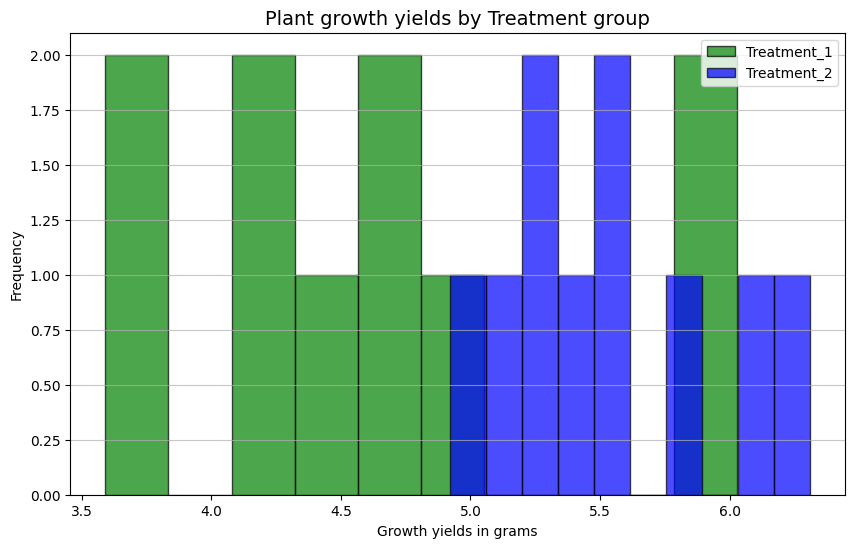

In [17]:
# creating a new figure and setting the size of it
plt.figure(figsize=(10, 6))

# Histogram for heart_rate_before. By using the alpha paramter we can make the plot slightly transparent to allow
# us to overlap the heart_rate_before data with the heart_rate_after data:
plt.hist(trt_1, alpha= 0.7, label='Treatment_1', color='green', edgecolor='black')

# Histogram for heart_rate_after:
plt.hist(trt_2, alpha=0.7, label='Treatment_2', color='blue', edgecolor='black')

# Adding titles and labels
plt.title('Plant growth yields by Treatment group', fontsize=14)
plt.xlabel('Growth yields in grams', fontsize=10)
plt.ylabel('Frequency', fontsize=10)
plt.legend(fontsize=10)

# Show plot, including a transparent grid on the y-axis
plt.grid(axis='y', alpha=0.7)
plt.show()

This histogram illustrates the point above, that the mean of the 'treatment group 1' is smaller than the mean of 'treatment group 2', as we can see the data for the first group is shifted considerably to the left compared to that for the second group.

### ANOVA ###

To compare whether there is a significant difference between the three treatment groups, ctrl, trt1, and trt2, we use ANOVA. 

For one-way (single-factor) ANOVA, we use the F-statitic to calculate the ratio of the variance between the groups to the variance within the groups. We use tables to calculate a critical value of F at a certain significance level (α); this critical value of F depends upon the degrees of freedom of the numerator and the denominator. If F ≥ FCritical, we reject the null hypothesis.

To calculate the F-statistic, we can use the `f_oneway` function from scipy.stats. We will pass in the three treatment groups to this function:

In [18]:
# We have already created a sub-dataframe for trt1 and trt2 but still need to create one for the control group:
ctrl = df[df['group'] == 'ctrl']['weight']

# passing in the three arguments:
stats.f_oneway(ctrl, trt_1, trt_2)

F_onewayResult(statistic=4.846087862380136, pvalue=0.015909958325622895)

We can interpret the results of this test as follows:

**F-statistic**: 4.846. The significance of the F-statistic depends upon the degrees of freedom of the numberator and denominator. 
- The df of the numerator is K - 1, with K referring to the number of groups being compared. In this case there are 3 groups, do the df for the numerator = 3 - 1 = 2.
- The df of the denominator is N - 1, with N refering to the overall sample size. In this case, the sample size is 30, so the df for the denominator = 30 - 1 = 29.

From looking at the F Distribution tables for df1 = 2 and df2 = 29, we see that the 5% critical value for the F-statistic is 2.49548. http://www.socr.ucla.edu/Applets.dir/F_Table.html

The F-statistic of 4.546 we obtained exceeds this critical value, indicating the means of each of three groups are unlikely to be equal.

**p-value**: 0.0159. This tells us that, if the null hypothesis of equal means between the three groups was true, the chance of seeing an outcome of the variance between the three groups being as extreme as this would be 1.59%.

To analyse the pairwise comparisons of each of the groups, we can use Tukey's honestly significant difference test (HSD):


In [22]:
res = stats.tukey_hsd(ctrl, trt_1, trt_2)

print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



The results of this post-hoc test show that the difference in means between the group which received treatment 1 and the group which received treatment 2 are large enough that they are statistically significant at the 5% significance level; we can tell this since the p-value is less than 0.05 for these comparisons. For the difference in means between the control group and each of the two treatment groups, the p-values are comfortably above 0.05, indicating that the difference in means between the control group and these groups is not significant.

### Multiple T-Tests vs ANOVA ###

When comparing the means of more than two groups, it is more appropriate to use ANOVA than multiple t-tests for a few reasons:

1. For a t-test, there is always a chance of a type I error. This is the also known as a false positive, as it refers to when the null hypothesis is rejected despite it being true. The probability of a type I error is equal to the significance level of the test. In the case of one t-test with a signficance level (α) of 5%, you have a 5% of seeing a type 1 error. If you had seven datasets and wanted to compare the means of each dataset to one another, you would have 21 pairwise combinations; if each of these has a 5% chance of producing a type-I error, it becomes likely that you will see at least one type I error.

2. Carrying out ANOVA is computationally more efficient than carrying out multiple t-tests.

3. ANOVA allows for post-hoc testing to identify the source or sources of a significant result, after a signficant result is indicated.

### References ###

